In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

path = '/content/gdrive/My Drive/Colab Notebooks/EAAI21/data/'

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [14]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model

from sklearn import model_selection
import matplotlib.pyplot as plt


In [30]:
data = pd.read_csv(path+'solvability.csv')
y = data.loc[:, 'solvability']
X = data.drop(columns='solvability')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
def doExperiment(trainInput, trainOutput):
    alg = LinearRegression()
    cvMeanScore = model_selection.cross_val_score(alg, trainInput.loc[:,:], trainOutput, cv=10, scoring = 'neg_mean_squared_error', n_jobs=-1).mean()
    print("CV Average Score:", cvMeanScore)

def doExperiment2(trainInput, trainOutput, x):
    alg = linear_model.Ridge(alpha=x, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=None, solver='auto', tol=0.001)
    cvMeanScore = model_selection.cross_val_score(alg, trainInput.loc[:,:], trainOutput, cv=10, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    # print("CV Average Score - Ridge " + str(x) + " :", cvMeanScore)
    return cvMeanScore

def doExperiment3(trainInput, trainOutput, x):
    gbrt=GradientBoostingRegressor(n_estimators=100,learning_rate=x) 
    cvMeanScore = model_selection.cross_val_score(gbrt, trainInput.loc[:,:], trainOutput, cv=10, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    #print("CV Average Score:", cvMeanScore)
    #print(cvMeanScore)
    return cvMeanScore

def doExperiment4(trainInput, trainOutput, x):
    alg = Lasso(alpha=x)
    cvMeanScore = model_selection.cross_val_score(alg, trainInput.loc[:,], trainOutput, cv=10, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    #print("CV Average Score:", cvMeanScore)
    return cvMeanScore

In [40]:
#===============================================================================
'''
Tuning hyperparameter
'''
def tuneGBR(trainInput,trainOutput):
    
    #alphaList = pd.Series([.0001,.001,.01,.03,.1,.3,1,1.3,2,100,1000])
    tuneSeq = np.arange(.01,1,.01)
    alphaList = pd.Series(tuneSeq,index=tuneSeq)
    acc = alphaList.map(lambda x: doExperiment3(trainInput, trainOutput, x) )
    print("Highest Accuracy N Value:",acc.idxmax())
    print("\nResult:",acc.max())
    plt.figure(figsize=(15,7))
    plt.plot(alphaList, acc)
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title('Tunning of GBR')
    plt.grid(True)
    plt.savefig("TuningGBR.png", dpi=500, bbox_inches='tight')
    plt.show()
    
def tuneRidge(trainInput,trainOutput):
    #alphaList = pd.Series([.0001,.001,.01,.03,.1,.3,1,1.3,2,100,1000])
    tuneSeq = np.arange(.01,5,.05)
    alphaList = pd.Series(tuneSeq,index=tuneSeq)
    acc = alphaList.map(lambda x: doExperiment2(trainInput, trainOutput, x) )
    print("Highest Accuracy N Value:",acc.idxmax())
    print("\nResult:",acc.max())
    plt.figure(figsize=(15,7))
    plt.plot(alphaList, acc)
    plt.xlabel('alpha')
    plt.ylabel('Accuracy')
    plt.title('Tunning of Linear Ridge')
    plt.grid(True)
    plt.savefig("TuningRidge.png", dpi=500, bbox_inches='tight')
    plt.show()
    
def tuneLasso(trainInput,trainOutput):
    #alphaList = pd.Series([.0001,.001,.01,.03,.1,.3,1,1.3,2,100,1000])
    tuneSeq = np.arange(.01,5,.05)
    alphaList = pd.Series(tuneSeq,index=tuneSeq)
    acc = alphaList.map(lambda x: doExperiment4(trainInput, trainOutput, x) )
    print("Highest Accuracy N Value:",acc.idxmax())
    print("\nResult:",acc.max())
    plt.figure(figsize=(15,7))
    plt.plot(alphaList, ["{:.2f}".format(i) for i in acc])
    plt.xlabel('alpha')
    plt.ylabel('Accuracy')
    plt.title('Tunning of Lasso')
    plt.grid(True)
    plt.savefig("TuningLasso.png", dpi=500, bbox_inches='tight')
    plt.show()

Highest Accuracy N Value: 4.96

Result: -77846660.10997605


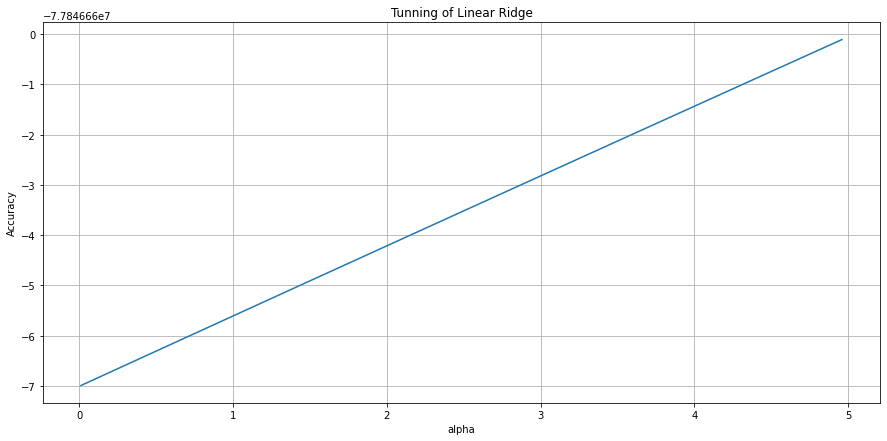

Highest Accuracy N Value: 0.01

Result: -77846666.88163076


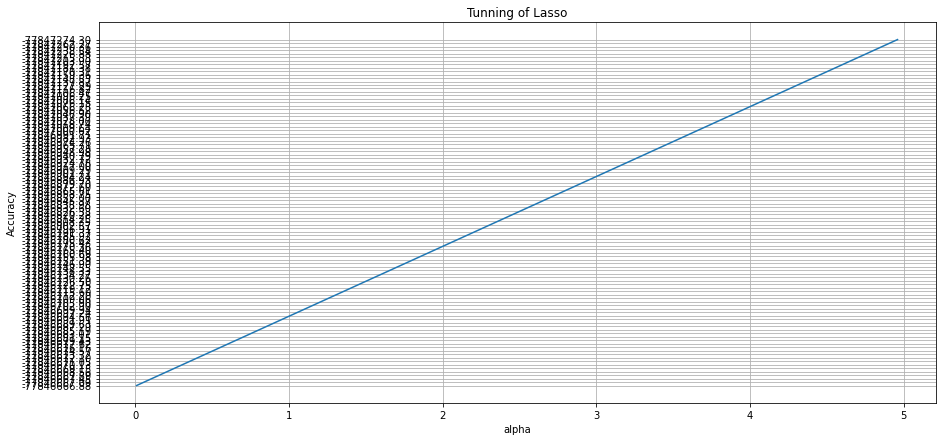

In [41]:
# tuneGBR(X,y)
tuneRidge(X,y)
tuneLasso(X,y)

In [35]:
doExperiment(X, y)

CV Average Score: -77846667.00572841


In [24]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we